<a href="https://colab.research.google.com/github/EugeneDyw/Stat6289/blob/main/Stat6289Midterm/fashionmnist_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
import os
import tensorflow as tf
import matplotlib.pyplot as plt

batch_size = 512
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name='keras_fashionmnist_trained_model_dropout_aug.h5'
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
def build_cnn(opt, learning_rate):
  if opt=='RMSprop':
    # initiate RMSprop optimizer
    opt = keras.optimizers.legacy.RMSprop(learning_rate=learning_rate, decay=1e-6)

  else:
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))


  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
      optimizer=opt,
      metrics=['accuracy'])
  x_train_def = x_train.astype('float32')/255
  x_test_def = x_test.astype('float32')/255


  if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train_def, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_test_def, y_test),
                      shuffle=True)
  else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
      featurewise_center=False, # set input mean to 0 over the dataset
      samplewise_center=False, # set each sample mean to 0
      featurewise_std_normalization=False, # divide inputs by std of the dataset
      samplewise_std_normalization=False, # divide each input by its std
      zca_whitening=False, # apply ZCA whitening
      zca_epsilon=1e-06, # epsilon for ZCA whitening
      rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
      # randomly shift images horizontally (fraction of total width)
      width_shift_range=0.1,
      # randomly shift images vertically (fraction of total height)
      height_shift_range=0.1,
      shear_range=0., # set range for random shear
      zoom_range=0., # set range for random zoom
      channel_shift_range=0., # set range for random channel shifts
      # set mode for filling points outside the input boundaries
      fill_mode='nearest',
      cval=0., # value used for fill_mode = "constant"
      horizontal_flip=True, # randomly flip images
      vertical_flip=False, # randomly flip images
      # set rescaling factor (applied before any other transformation)
      rescale=None,
      # set function that will be applied on each input
      preprocessing_function=None,
      # image data format, either "channels_first" or "channels_last"
      data_format=None,
      # fraction of images reserved for validation (strictly between 0 and 1)
      validation_split=0.0)
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train_def)

    # Fit the model on the batches generated by datagen.flow()
    history = model.fit(datagen.flow(x_train_def, y_train, batch_size=batch_size),
                        epochs=epochs, validation_data=(x_test_def, y_test), workers=4)


  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)
  #print('Saved trained model at %s ' % model_path)

  scores = model.evaluate(x_test_def, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])

  return history

In [ ]:
print("RMSprop Learning Rate=0.0001")
history1 = build_cnn('RMSprop', 0.0001)

print("RMSprop Learning Rate=0.001")
history2 = build_cnn('RMSprop', 0.001)

print("Adam Learning Rate=0.0001")
history3 = build_cnn('Adam', 0.0001)

print("Adam Learning Rate=0.001")
history4 = build_cnn('Adam', 0.001)


RMSprop Learning Rate=0.0001
Using real-time data augmentation.
Epoch 1/10
118/118 [==============================] - 26s 211ms/step - loss: 1.5163 - accuracy: 0.4618 - val_loss: 0.8446 - val_accuracy: 0.7091
Epoch 2/10
118/118 [==============================] - 25s 206ms/step - loss: 0.9607 - accuracy: 0.6520 - val_loss: 0.7316 - val_accuracy: 0.7260
Epoch 3/10
118/118 [==============================] - 25s 205ms/step - loss: 0.8291 - accuracy: 0.6938 - val_loss: 0.6537 - val_accuracy: 0.7467
Epoch 4/10
118/118 [==============================] - 25s 204ms/step - loss: 0.7566 - accuracy: 0.7166 - val_loss: 0.6220 - val_accuracy: 0.7600
Epoch 5/10
118/118 [==============================] - 25s 204ms/step - loss: 0.7164 - accuracy: 0.7303 - val_loss: 0.5896 - val_accuracy: 0.7710
Epoch 6/10
118/118 [==============================] - 24s 198ms/step - loss: 0.6761 - accuracy: 0.7446 - val_loss: 0.5511 - val_accuracy: 0.7837
Epoch 7/10
118/118 [==============================] - 25s 199ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 3ms/step - loss: 0.4728 - accuracy: 0.8198
Test loss: 0.4727911055088043
Test accuracy: 0.8198000192642212
RMSprop Learning Rate=0.001
Using real-time data augmentation.
Epoch 1/10
118/118 [==============================] - 25s 203ms/step - loss: 1.0207 - accuracy: 0.6231 - val_loss: 0.5913 - val_accuracy: 0.7732
Epoch 2/10
118/118 [==============================] - 24s 201ms/step - loss: 0.6218 - accuracy: 0.7605 - val_loss: 0.4792 - val_accuracy: 0.8187
Epoch 3/10
118/118 [==============================] - 24s 197ms/step - loss: 0.5201 - accuracy: 0.8019 - val_loss: 0.4217 - val_accuracy: 0.8412
Epoch 4/10
118/118 [==============================] - 24s 198ms/step - loss: 0.4649 - accuracy: 0.8265 - val_loss: 0.3716 - val_accuracy: 0.8635
Epoch 5/10
118/118 [==============================] - 24s 200ms/step - loss: 0.4245 - accuracy: 0.8414 - val_loss: 0.3671 - val_accuracy: 0.8588
Epoch 6/10
118/118 [==============================] - 25s 2

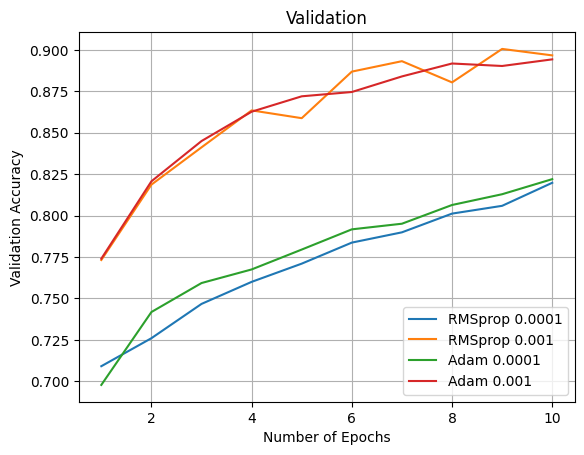

In [ ]:
# Plot the validation accuracy
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, history1.history['val_accuracy'], label='RMSprop 0.0001')
plt.plot(epochs_range, history2.history['val_accuracy'], label='RMSprop 0.001')
plt.plot(epochs_range, history3.history['val_accuracy'], label='Adam 0.0001')
plt.plot(epochs_range, history4.history['val_accuracy'], label='Adam 0.001')

plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("Adam Learning Rate=0.01")
history5 = build_cnn('Adam', 0.01)

print("Adam Learning Rate=0.1")
history6 = build_cnn('Adam', 0.1)

Adam Learning Rate=0.01
Using real-time data augmentation.
Epoch 1/10
118/118 [==============================] - 25s 186ms/step - loss: 1.1386 - accuracy: 0.5658 - val_loss: 0.6286 - val_accuracy: 0.7453
Epoch 2/10
118/118 [==============================] - 24s 200ms/step - loss: 0.7174 - accuracy: 0.7196 - val_loss: 0.5475 - val_accuracy: 0.7757
Epoch 3/10
118/118 [==============================] - 25s 206ms/step - loss: 0.6655 - accuracy: 0.7383 - val_loss: 0.5249 - val_accuracy: 0.7939
Epoch 4/10
118/118 [==============================] - 24s 201ms/step - loss: 0.6397 - accuracy: 0.7517 - val_loss: 0.4938 - val_accuracy: 0.8115
Epoch 5/10
118/118 [==============================] - 25s 204ms/step - loss: 0.6257 - accuracy: 0.7580 - val_loss: 0.5440 - val_accuracy: 0.7952
Epoch 6/10
118/118 [==============================] - 24s 197ms/step - loss: 0.6048 - accuracy: 0.7652 - val_loss: 0.4844 - val_accuracy: 0.8122
Epoch 7/10
118/118 [==============================] - 25s 203ms/step - 

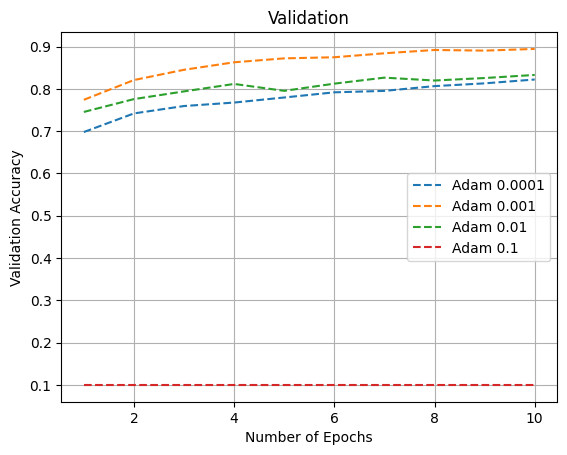

In [ ]:
# Plot the validation accuracy
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, history3.history['val_accuracy'], label='Adam 0.0001', linestyle='--')
plt.plot(epochs_range, history4.history['val_accuracy'], label='Adam 0.001', linestyle='--')
plt.plot(epochs_range, history5.history['val_accuracy'], label='Adam 0.01', linestyle='--')
plt.plot(epochs_range, history6.history['val_accuracy'], label='Adam 0.1', linestyle='--')

plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation')
plt.grid(True)
plt.legend()
plt.show()